In [1]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [4]:
import pandas as pd
rawdata = pd.read_csv('diabetes.csv')
rawdata.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
rawdata.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [6]:
rawdata.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

## 提取輸入特徵與標籤

In [15]:
datanames = rawdata.columns
print("資料欄位名稱：" ,datanames)

data = rawdata.to_numpy()
print("\n資料維度：", data.shape)

資料欄位名稱： Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

資料維度： (768, 9)


In [30]:
import numpy as np
from collections import Counter

featurenames = datanames[0:8]
print("特徵名稱：" ,featurenames)

feature = np.delete(data, 8, axis=1) 
label = data[:,8]

print("\n資料集類別數量：%s" %Counter(label))

特徵名稱： Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

資料集類別數量：Counter({0.0: 500, 1.0: 268})


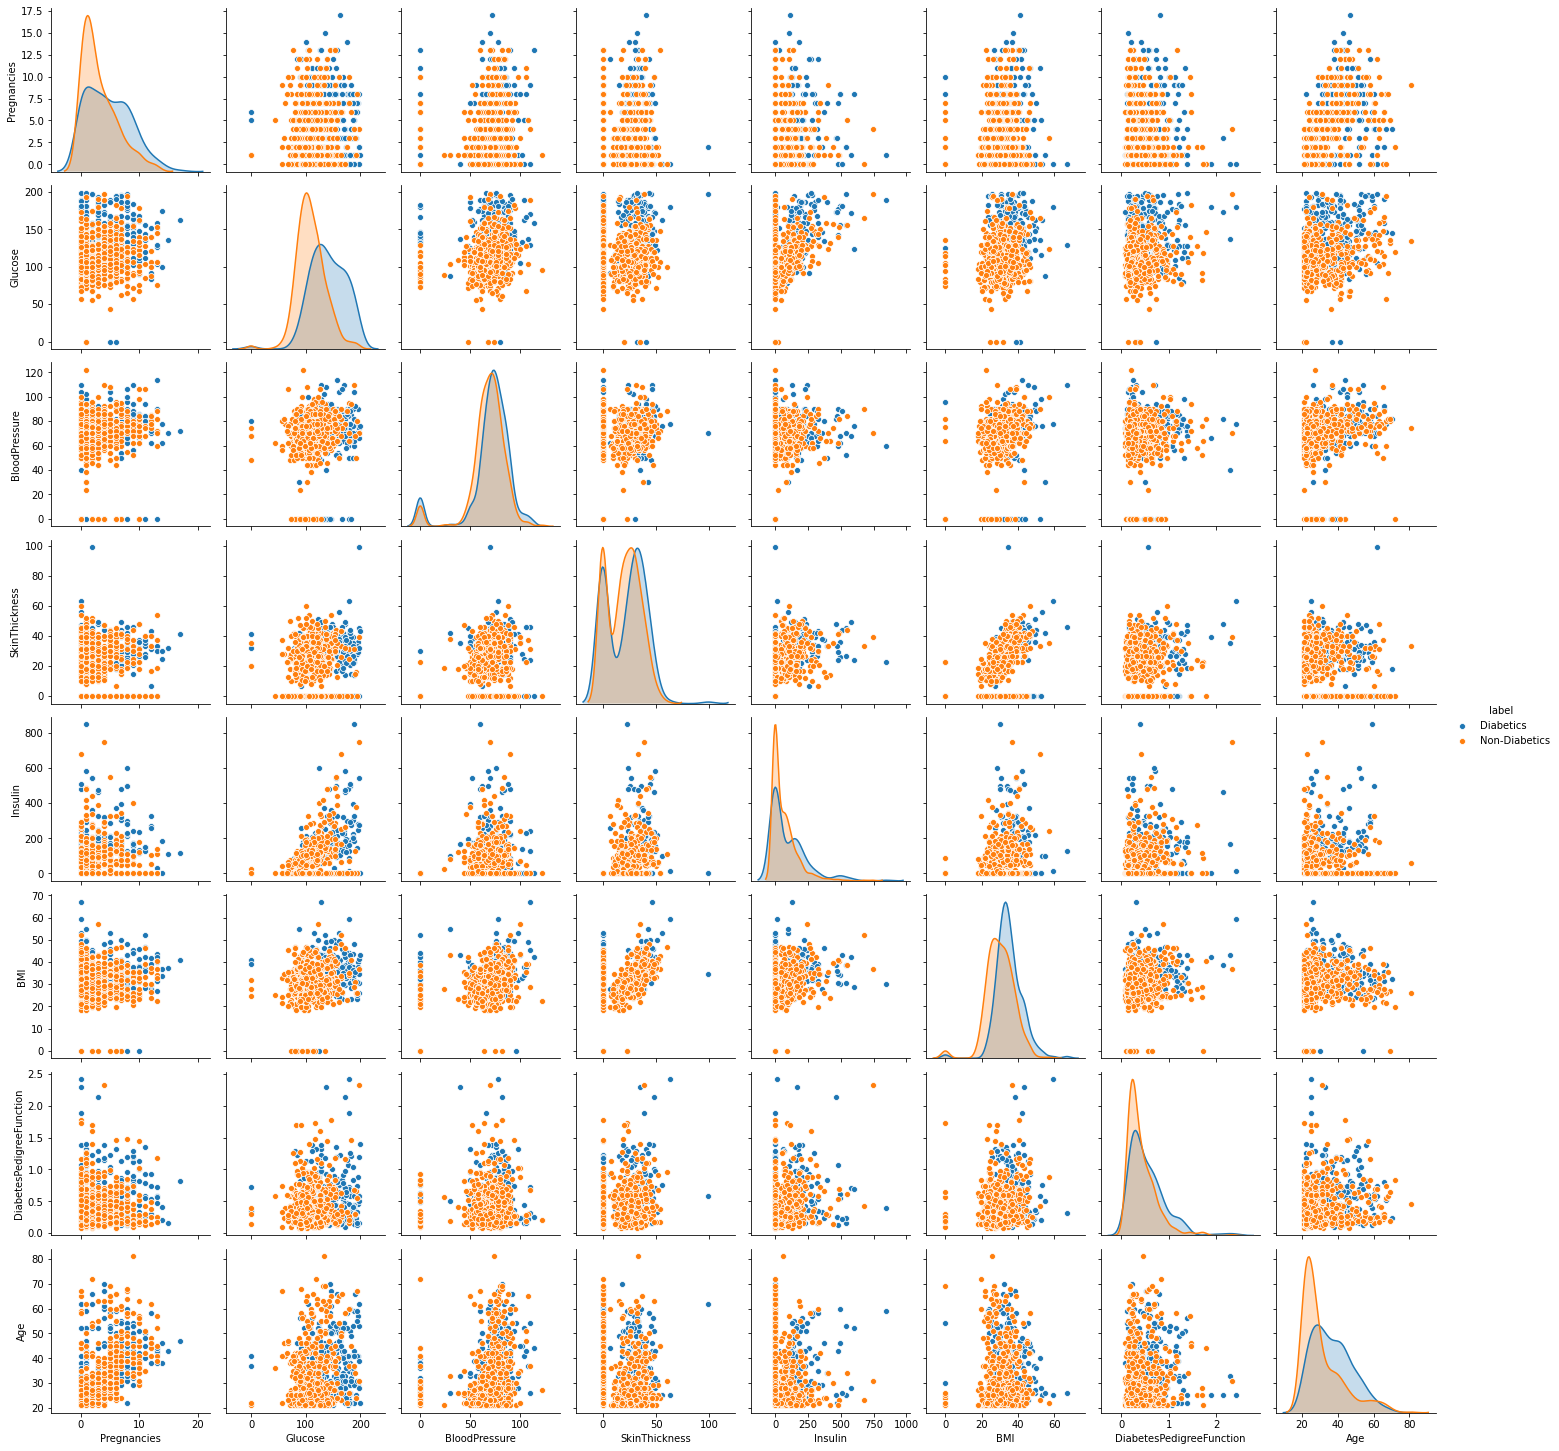

In [127]:
import seaborn as sns

df = pd.DataFrame(feature, columns=featurenames)
label_name = np.array(['Non-Diabetics', 'Diabetics'])
df['label'] = np.array([label_name[i] for i in label.astype(int)])
sns.pairplot(df, hue='label')

In [128]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,label
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,Diabetics
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,Non-Diabetics
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,Diabetics
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,Non-Diabetics
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,Diabetics
5,5.0,116.0,74.0,0.0,0.0,25.6,0.201,30.0,Non-Diabetics
6,3.0,78.0,50.0,32.0,88.0,31.0,0.248,26.0,Diabetics
7,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,Non-Diabetics
8,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,Diabetics
9,8.0,125.0,96.0,0.0,0.0,0.0,0.232,54.0,Diabetics


In [88]:
from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(feature, label, random_state = 0, test_size = 0.2)

print("訓練集數量", len(train_x))
print("測試集數量", len(test_x))
print("訓練集類別數量：%s" %Counter(train_y))
print("測試集類別數量：%s" %Counter(test_y))

訓練集數量 614
測試集數量 154
訓練集類別數量：Counter({0.0: 393, 1.0: 221})
測試集類別數量：Counter({0.0: 107, 1.0: 47})


In [0]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
test_x = scaler.transform(test_x)

最佳超參數： 18


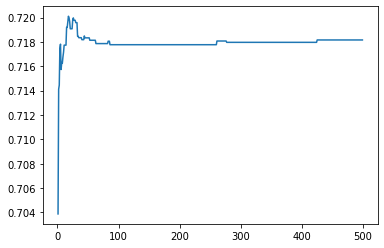

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc

auc_list, h_list = [], []

for h in np.arange(1, 500, 1):
  LG = LogisticRegression(max_iter=10000,C=h,penalty='l2', random_state=0)
  LG.fit(train_x, train_y)
  proba = LG.predict_proba(test_x)[:,1]
  precision, recall, thresholds = precision_recall_curve(test_y, proba)
  lg_auc = auc(recall, precision)
  auc_list.append(lg_auc)
  h_list.append(h)

max_index = auc_list.index(max(auc_list))
print("最佳超參數：", h_list[max_index])
plt.plot(h_list, auc_list)
plt.show()

In [108]:
LG = LogisticRegression(max_iter=10000,C=h_list[max_index],penalty='l2', random_state=0)
LG.fit(train_x, train_y)

LogisticRegression(C=18, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

[Choosing Colormaps in Matplotlib](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

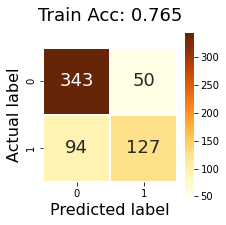

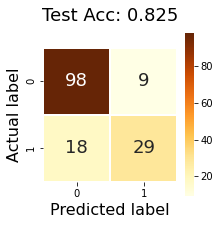

In [109]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

predictions = LG.predict(train_x)
cm = confusion_matrix(train_y, predictions)
acc = accuracy_score(train_y, predictions)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 18}, fmt="d", linewidths=1.0, square = True, cmap = 'YlOrBr');
plt.ylabel('Actual label', size = 16);
plt.xlabel('Predicted label', size = 16);
plt.title('Train Acc: %0.3f\n' %(acc), size = 18);

predictions = LG.predict(test_x)
cm = confusion_matrix(test_y, predictions)
acc = accuracy_score(test_y, predictions)

plt.figure(figsize=(3,3))
sns.heatmap(cm, annot=True, annot_kws={"size": 18}, fmt="d", linewidths=1.0, square = True, cmap = 'YlOrBr');
plt.ylabel('Actual label', size = 16);
plt.xlabel('Predicted label', size = 16);
plt.title('Test Acc: %0.3f\n' %(acc), size = 18);

In [122]:
print("模型權重(係數):", LG.coef_)
print("模型偏差(截距):", LG.intercept_)

模型權重(係數): [[ 1.50824987  6.48015831 -1.56112643  0.44160635 -1.06594621  5.54159778
   2.01453865  1.19740801]]
模型偏差(截距): [-7.42902107]


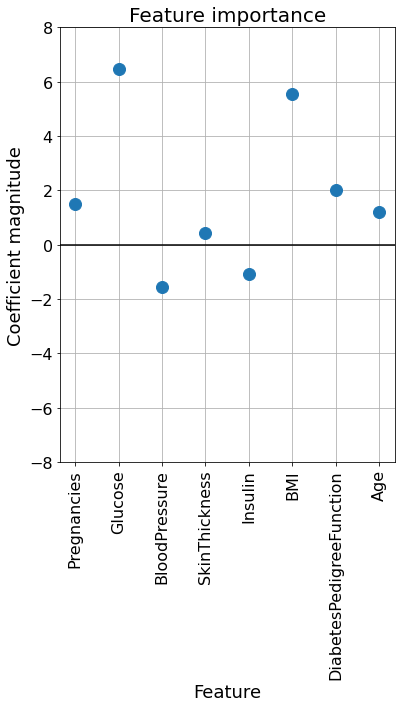

In [121]:
plt.figure(figsize=(6, 8))
plt.title('Feature importance',size = 20)
plt.plot(LG.coef_[0].T,'o',markersize=12)  
plt.xticks(range(len(featurenames)), featurenames , rotation=90, size = 16)
plt.yticks(rotation=0,size = 16 )
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-8, 8) 
plt.grid()
plt.xlabel("Feature",size = 18)
plt.ylabel("Coefficient magnitude",size = 18)
plt.show()

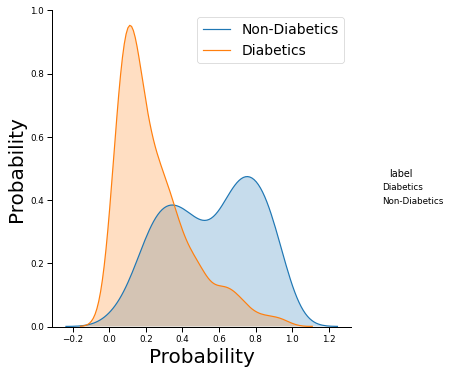

In [150]:
maxmin_feature = scaler.transform(feature)
proba = LG.predict_proba(maxmin_feature)[:,1]
predictions_df = pd.DataFrame(proba, columns=['Probability'])
label_name = np.array(['Non-Diabetics', 'Diabetics'])
predictions_df['label'] = np.array([label_name[i] for i in label.astype(int)])
sns.set_context("paper", rc={"axes.labelsize":20})
sns.pairplot(predictions_df, hue='label',height=5)
plt.legend(loc='upper right', labels=label_name, fontsize = 'x-large')

# 儲存與讀取模型

In [0]:
from sklearn.externals import joblib 

#儲存Model
joblib.dump(LG, 'Logistic_Regression_Diabetes.pkl')

#讀取Model
LG = joblib.load('Logistic_Regression_Diabetes.pkl')